# Working With Timeseries Data

In [70]:
from __future__ import annotations

import datetime
from pathlib import Path

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from dateutil import parser


## Introduction to Timeseries Data

Time series data is everywhere — from financial markets and climate records to server logs and social media analytics. Understanding how to manipulate, analyze, and visualize this type of data is essential for data scientists, analysts, and anyone working with time-dependent information.

Originally developed for financial time series such as daily stock market prices, the robust and flexible data structures in pandas can be applied to time series data in any domain, including business, science, engineering, public health, and many others. With these tools you can easily organize, transform, analyze, and visualize your data at any level of granularity — examining details during specific time periods of interest, and zooming out to explore variations on different time scales, such as monthly or annual aggregations, recurring patterns, and long-term trends.

<p>In the broadest definition, a <strong>time series</strong> is any data set where the values are measured at different points in time. Many time series are uniformly spaced at a specific frequency, for example, hourly weather measurements, daily counts of web site visits, or monthly sales totals. Time series can also be irregularly spaced and sporadic, for example, timestamped data in a computer system’s event log or a history of 911 emergency calls. Pandas time series tools apply equally well to either type of time series.</p>

Pandas was developed in the context of financial modeling, so as you might expect, it contains a fairly extensive set of tools for working with dates, times, and time-indexed data. Date and time data comes in a few flavors, which we will discuss here:
- **Time stamps** reference particular moments in time (e.g., July 4th, 2015 at 7:00am).
- **Time intervals** and periods reference a length of time between a particular beginning and end point; for example, the year 2015. Periods usually reference a special case of time intervals in which each interval is of uniform length and does not overlap (e.g., 24 hour-long periods comprising days).
- **Time deltas** or durations reference an exact length of time (e.g., a duration of 22.56 seconds).

## Working with Dates and Times in Python

The Python world has a number of available representations of dates, times, deltas, and timespans. While the time series tools provided by Pandas tend to be the most useful for data science applications, it is helpful to see their relationship to other packages used in Python.

### Native Python dates and times: datetime

Python's basic objects for working with dates and times reside in the built-in datetime module. 

For example, you can manually build a date using the datetime type:

In [ ]:
datetime.datetime(year=2019, month=7, day=4, tzinfo=datetime.timezone.utc)

datetime.datetime(2019, 7, 4, 0, 0, tzinfo=datetime.timezone.utc)

Get Current Date and Time:

In [4]:
datetime_object = datetime.datetime.now(tz=datetime.timezone.utc)
print(datetime_object)
print(type(datetime_object))
datetime_object

2025-05-05 08:18:23.533337+00:00
<class 'datetime.datetime'>


datetime.datetime(2025, 5, 5, 8, 18, 23, 533337, tzinfo=datetime.timezone.utc)

Get date from a timestamp: We can also create date objects from a timestamp. A Unix timestamp is the number of seconds between a particular date and January 1, 1970 at UTC. You can convert a timestamp to date using fromtimestamp() method.

In [7]:
timestamp = datetime.datetime.fromtimestamp(1326244364, tz=datetime.timezone.utc)
print("Date =", timestamp)

Date = 2012-01-11 01:12:44+00:00


Format date using strftime():

In [8]:
# current date and time
now = datetime.datetime.now(tz=datetime.timezone.utc)

t = now.strftime("%H:%M:%S")
print("time:", t)
print(type(t))

s1 = now.strftime("%m/%d/%Y, %H:%M:%S")
# mm/dd/YY H:M:S format
print("s1:", s1)

s2 = now.strftime("%d/%m/%YT%H:%M:%S")
# dd/mm/YY H:M:S format
print("s2:", s2)

time: 08:24:01
<class 'str'>
s1: 05/05/2025, 08:24:01
s2: 05/05/2025T08:24:01


The strptime() method creates a datetime object from a given string (representing date and time).

In [12]:
date_string = "21 June, 2018"
print("date_string =", date_string)

date_object = datetime.datetime.strptime(date_string, "%d %B, %Y").astimezone(datetime.timezone.utc)
date_object

date_string = 21 June, 2018


datetime.datetime(2018, 6, 20, 22, 0, tzinfo=datetime.timezone.utc)

### Native Python dates and times: dateutil

Or, using the dateutil module, you can parse dates from a variety of string formats:

In [14]:
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

Once you have a datetime object, you can do things like printing the day of the week:

In [16]:
date.strftime("%A")

'Saturday'

<div class="text_cell_render border-box-sizing rendered_html">
<p>In the final line, we've used one of the standard string format codes for printing dates (<code>"%A"</code>), which you can read about in the <a href="https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior">strftime section</a> of Python's <a href="https://docs.python.org/3/library/datetime.html">datetime documentation</a>.
Documentation of other useful date utilities can be found in <a href="http://labix.org/python-dateutil">dateutil's online documentation</a>.
A related package to be aware of is <a href="http://pytz.sourceforge.net/"><code>pytz</code></a>, which contains tools for working with the most migrane-inducing piece of time series data: time zones.</p>
<p>The power of <code>datetime</code> and <code>dateutil</code> lie in their flexibility and easy syntax: you can use these objects and their built-in methods to easily perform nearly any operation you might be interested in.
Where they break down is when you wish to work with large arrays of dates and times:
just as lists of Python numerical variables are suboptimal compared to NumPy-style typed numerical arrays, lists of Python datetime objects are suboptimal compared to typed arrays of encoded dates.</p>

</div>

### Typed arrays of times: NumPy's datetime64

The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy. The datetime64 dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly. The datetime64 requires a very specific input format:

In [17]:
date = np.array("2015-07-04", dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

Once we have this date formatted, however, we can quickly do vectorized operations on it:

In [18]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

Because of the uniform type in NumPy datetime64 arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's datetime objects, especially as arrays get large.

One detail of the datetime64 and timedelta64 objects is that they are built on a fundamental time unit. Because the datetime64 object is limited to 64-bit precision, the range of encodable times is $2^{64}$ times this fundamental unit. In other words, datetime64 imposes a trade-off between time resolution and maximum time span.

For example, if you want a time resolution of one nanosecond, you only have enough information to encode a range of $2^{64}$ nanoseconds, or just under 600 years. NumPy will infer the desired unit from the input; for example, here is a day-based datetime:

In [19]:
np.datetime64("2015-07-04")

np.datetime64('2015-07-04')

Here is a minute-based datetime:

In [20]:
np.datetime64("2015-07-04 12:00")

np.datetime64('2015-07-04T12:00')

Notice that the time zone is automatically set to the local time on the computer executing the code. You can force any desired fundamental unit using one of many format codes; for example, here we'll force a nanosecond-based time:

In [21]:
np.datetime64("2015-07-04 12:59:59.50", "ns")

np.datetime64('2015-07-04T12:59:59.500000000')

<p>The following table, drawn from the <a href="http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html">NumPy datetime64 documentation</a>, lists the available format codes along with the relative and absolute timespans that they can encode:</p>

<div class="cell border-box-sizing text_cell rendered"><div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<table>
<thead><tr>
<th>Code</th>
<th>Meaning</th>
<th>Time span (relative)</th>
<th>Time span (absolute)</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>Y</code></td>
<td>Year</td>
<td>± 9.2e18 years</td>
<td>[9.2e18 BC, 9.2e18 AD]</td>
</tr>
<tr>
<td><code>M</code></td>
<td>Month</td>
<td>± 7.6e17 years</td>
<td>[7.6e17 BC, 7.6e17 AD]</td>
</tr>
<tr>
<td><code>W</code></td>
<td>Week</td>
<td>± 1.7e17 years</td>
<td>[1.7e17 BC, 1.7e17 AD]</td>
</tr>
<tr>
<td><code>D</code></td>
<td>Day</td>
<td>± 2.5e16 years</td>
<td>[2.5e16 BC, 2.5e16 AD]</td>
</tr>
<tr>
<td><code>h</code></td>
<td>Hour</td>
<td>± 1.0e15 years</td>
<td>[1.0e15 BC, 1.0e15 AD]</td>
</tr>
<tr>
<td><code>m</code></td>
<td>Minute</td>
<td>± 1.7e13 years</td>
<td>[1.7e13 BC, 1.7e13 AD]</td>
</tr>
<tr>
<td><code>s</code></td>
<td>Second</td>
<td>± 2.9e12 years</td>
<td>[ 2.9e9 BC, 2.9e9 AD]</td>
</tr>
<tr>
<td><code>ms</code></td>
<td>Millisecond</td>
<td>± 2.9e9 years</td>
<td>[ 2.9e6 BC, 2.9e6 AD]</td>
</tr>
<tr>
<td><code>us</code></td>
<td>Microsecond</td>
<td>± 2.9e6 years</td>
<td>[290301 BC, 294241 AD]</td>
</tr>
<tr>
<td><code>ns</code></td>
<td>Nanosecond</td>
<td>± 292 years</td>
<td>[ 1678 AD, 2262 AD]</td>
</tr>
<tr>
<td><code>ps</code></td>
<td>Picosecond</td>
<td>± 106 days</td>
<td>[ 1969 AD, 1970 AD]</td>
</tr>
<tr>
<td><code>fs</code></td>
<td>Femtosecond</td>
<td>± 2.6 hours</td>
<td>[ 1969 AD, 1970 AD]</td>
</tr>
<tr>
<td><code>as</code></td>
<td>Attosecond</td>
<td>± 9.2 seconds</td>
<td>[ 1969 AD, 1970 AD]</td>
</tr>
</tbody>
</table>

</div>
</div>
</div>

For the types of data we see in the real world, a useful default is datetime64[ns], as it can encode a useful range of modern dates with a suitably fine precision.

Finally, we will note that while the datetime64 data type addresses some of the deficiencies of the built-in Python datetime type, it lacks many of the convenient methods and functions provided by datetime and especially dateutil. More information can be found in NumPy's datetime64 documentation.

## Dates and times in Pandas

<p>pandas captures 4 general time related concepts:</p>

<ol class="arabic simple">
<li><p>Date times: A specific date and time with timezone support. Similar to <code class="docutils literal notranslate"><span class="pre">datetime.datetime</span></code> from the standard library.</p></li>
<li><p>Time deltas: An absolute time duration. Similar to <code class="docutils literal notranslate"><span class="pre">datetime.timedelta</span></code> from the standard library.</p></li>
<li><p>Time spans: A span of time defined by a point in time and its associated frequency.</p></li>
<li><p>Date offsets: A relative time duration that respects calendar arithmetic. Similar to <code class="docutils literal notranslate"><span class="pre">dateutil.relativedelta.relativedelta</span></code> from the <code class="docutils literal notranslate"><span class="pre">dateutil</span></code> package.</p></li>
</ol>

<table class="table">
<colgroup>
<col style="width: 15%">
<col style="width: 12%">
<col style="width: 13%">
<col style="width: 31%">
<col style="width: 28%">
</colgroup>
<thead>
<tr class="row-odd"><th class="head"><p>Concept</p></th>
<th class="head"><p>Scalar Class</p></th>
<th class="head"><p>Array Class</p></th>
<th class="head"><p>pandas Data Type</p></th>
<th class="head"><p>Primary Creation Method</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p>Date times</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">Timestamp</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">DatetimeIndex</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">datetime64[ns]</span></code> or <code class="docutils literal notranslate"><span class="pre">datetime64[ns,</span> <span class="pre">tz]</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">to_datetime</span></code> or <code class="docutils literal notranslate"><span class="pre">date_range</span></code></p></td>
</tr>
<tr class="row-odd"><td><p>Time deltas</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">Timedelta</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">TimedeltaIndex</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">timedelta64[ns]</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">to_timedelta</span></code> or <code class="docutils literal notranslate"><span class="pre">timedelta_range</span></code></p></td>
</tr>
<tr class="row-even"><td><p>Time spans</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">Period</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">PeriodIndex</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">period[freq]</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">Period</span></code> or <code class="docutils literal notranslate"><span class="pre">period_range</span></code></p></td>
</tr>
<tr class="row-odd"><td><p>Date offsets</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">DateOffset</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">None</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">None</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">DateOffset</span></code></p></td>
</tr>
</tbody>
</table>

Pandas builds upon all the tools just discussed to provide a Timestamp object, which combines the ease-of-use of datetime and dateutil with the efficient storage and vectorized interface of numpy.datetime64. From a group of these Timestamp objects, Pandas can construct a DatetimeIndex that can be used to index data in a Series or DataFrame; we'll see many examples of this below.

For example, we can use Pandas tools to repeat the demonstration from above. We can parse a flexibly formatted string date, and use format codes to output the day of the week:

In [22]:
date = pd.to_datetime("4th of July, 2015")
print(type(date))
date

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Timestamp('2015-07-04 00:00:00')

In [24]:
date.strftime("%A")

'Saturday'

Additionally, we can do NumPy-style vectorized operations directly on this same object:

In [25]:
date + pd.to_timedelta(np.arange(12), "D")

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In pandas, a single point in time is represented as a <strong>Timestamp</strong>. We can use the <code>to_datetime()</code> function to create Timestamps from strings in a wide variety of date/time formats. Let’s import pandas and convert a few dates and times to Timestamps.</p>

In [26]:
pd.to_datetime("2018-01-15 3:45pm")

Timestamp('2018-01-15 15:45:00')

In [27]:
pd.to_datetime("7/8/1952")

Timestamp('1952-07-08 00:00:00')

<p>As we can see, <code>to_datetime()</code> automatically infers a date/time format based on the input. In the example above, the ambiguous date <code>'7/8/1952'</code> is assumed to be <em>month/day/year</em> and is interpreted as July 8, 1952. Alternatively, we can use the <code>dayfirst</code> parameter to tell pandas to interpret the date as August 7, 1952.</p>

In [28]:
pd.to_datetime("7/8/1952", dayfirst=True)

Timestamp('1952-08-07 00:00:00')

<p>If we supply a list or array of strings as input to <code>to_datetime()</code>, it returns a sequence of date/time values in a <strong>DatetimeIndex</strong> object, which is the core data structure that powers much of pandas time series functionality.</p>

In [37]:
pd.to_datetime(["2018-01-05", "7/8/1952", "Oct 10, 1995"], format="mixed")

DatetimeIndex(['2018-01-05', '1952-07-08', '1995-10-10'], dtype='datetime64[ns]', freq=None)

<p>In the DatetimeIndex above, the data type <code>datetime64[ns]</code> indicates that the underlying data is stored as <code>64</code>-bit integers, in units of nanoseconds (ns). This data structure allows pandas to compactly store large sequences of date/time values and efficiently perform vectorized operations using <a href="https://docs.scipy.org/doc/numpy-1.15.0/reference/arrays.datetime.html">NumPy datetime64 arrays</a>.</p>

<p>If we’re dealing with a sequence of strings all in the same date/time format, we can explicitly specify it with the <code>format</code> parameter. For very large data sets, this can greatly speed up the performance of <code>to_datetime()</code> compared to the default behavior, where the format is inferred separately for each individual string. Any of the <a href="https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior">format codes</a> from the <code>strftime()</code> and <code>strptime()</code> functions in Python’s built-in datetime module can be used. The example below uses the format codes <code>%m</code> (numeric month), <code>%d</code> (day of month), and <code>%y</code> (2-digit year) to specify the format.</p>

In [38]:
pd.to_datetime(["2/25/10", "8/6/17", "12/15/12"], format="%m/%d/%y")

DatetimeIndex(['2010-02-25', '2017-08-06', '2012-12-15'], dtype='datetime64[ns]', freq=None)

### Pandas Time Series: Indexing by Time

Where the Pandas time series tools really become useful is when you begin to index data by timestamps. For example, we can construct a Series object that has time indexed data:

In [39]:
index = pd.DatetimeIndex(["2014-07-04", "2014-08-04", "2015-07-04", "2015-08-04"])

data = pd.Series([0, 1, 2, 3], index=index)

In [40]:
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

Now that we have this data in a Series, we can make use of any of the Series indexing patterns we discussed in previous sections, passing values that can be coerced into dates:

In [41]:
data["2014-07-04":"2015-07-04"]

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

There are additional special date-only indexing operations, such as passing a year to obtain a slice of all data from that year:

In [42]:
data["2015"]

2015-07-04    2
2015-08-04    3
dtype: int64

### Pandas Time Series Data Structures

This section will introduce the fundamental Pandas data structures for working with time series data:

<ul>
<li>For <em>time stamps</em>, Pandas provides the <code>Timestamp</code> type. As mentioned before, it is essentially a replacement for Python's native <code>datetime</code>, but is based on the more efficient <code>numpy.datetime64</code> data type. The associated Index structure is <code>DatetimeIndex</code>.</li>
<li>For <em>time Periods</em>, Pandas provides the <code>Period</code> type. This encodes a fixed-frequency interval based on <code>numpy.datetime64</code>. The associated index structure is <code>PeriodIndex</code>.</li>
<li>For <em>time deltas</em> or <em>durations</em>, Pandas provides the <code>Timedelta</code> type. <code>Timedelta</code> is a more efficient replacement for Python's native <code>datetime.timedelta</code> type, and is based on <code>numpy.timedelta64</code>. The associated index structure is <code>TimedeltaIndex</code>.</li>
</ul>

The most fundamental of these date/time objects are the Timestamp and DatetimeIndex objects. While these class objects can be invoked directly, it is more common to use the pd.to_datetime() function, which can parse a wide variety of formats. Passing a single date to pd.to_datetime() yields a Timestamp; passing a series of dates by default yields a DatetimeIndex:

In [43]:
dates = pd.to_datetime([datetime.datetime(2015, 7, 3), "4th of July, 2015", "2015-Jul-6", "07-07-2015", "20150708"], format="mixed")
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

Any DatetimeIndex can be converted to a PeriodIndex with the to_period() function with the addition of a frequency code; here we'll use 'D' to indicate daily frequency:

In [44]:
dates.to_period("D")

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

A TimedeltaIndex is created, for example, when a date is subtracted from another:

In [45]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### Regular sequences

<p>To make the creation of regular date sequences more convenient, Pandas offers a few functions for this purpose: <code>pd.date_range()</code> for timestamps, <code>pd.period_range()</code> for periods, and <code>pd.timedelta_range()</code> for time deltas.
We've seen that Python's <code>range()</code> and NumPy's <code>np.arange()</code> turn a startpoint, endpoint, and optional stepsize into a sequence.
Similarly, <code>pd.date_range()</code> accepts a start date, an end date, and an optional frequency code to create a regular sequence of dates.
By default, the frequency is one day:</p>

In [46]:
pd.date_range("2015-07-03", "2015-07-10")

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

Alternatively, the date range can be specified not with a start and endpoint, but with a startpoint and a number of periods:

In [47]:
pd.date_range("2015-07-03", periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

The spacing can be modified by altering the freq argument, which defaults to D. For example, here we will construct a range of hourly timestamps:

In [49]:
pd.date_range("2015-07-03", periods=8, freq="h")

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='h')

To create regular sequences of Period or Timedelta values, the very similar pd.period_range() and pd.timedelta_range() functions are useful. Here are some monthly periods:

In [50]:
pd.period_range("2015-07", periods=8, freq="M")

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

And a sequence of durations increasing by an hour:

In [52]:
pd.timedelta_range(0, periods=10, freq="h")

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='h')

## Analyzing electricity consumption setup

<p>We’ll be working with daily time series of <a href="https://open-power-system-data.org/">Open Power System Data (OPSD)</a> for Germany, which has been <a href="https://www.independent.co.uk/environment/renewable-energy-germany-six-months-year-solar-power-wind-farms-a8427356.html">rapidly expanding its renewable energy production in recent years</a>. The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017. You can download the data <a href="https://github.com/jenfly/opsd/raw/master/opsd_germany_daily.csv">here</a>.</p>

<p>Electricity production and consumption are reported as daily totals in gigawatt-hours (GWh). The columns of the data file are:</p>

<ul>
<li><code>Date</code> — The date (<em>yyyy-mm-dd</em> format)</li>
<li><code>Consumption</code> — Electricity consumption in GWh</li>
<li><code>Wind</code> — Wind power production in GWh</li>
<li><code>Solar</code> — Solar power production in GWh</li>
<li><code>Wind+Solar</code> — Sum of wind and solar power production in GWh</li>
</ul>

<p>We will explore how electricity consumption and production in Germany have varied over time, using pandas time series tools to answer questions such as:</p>

<ul>
<li>When is electricity consumption typically highest and lowest?</li>
<li>How do wind and solar power production vary with seasons of the year?</li>
<li>What are the long-term trends in electricity consumption, solar power, and wind power?</li>
<li>How do wind and solar power production compare with electricity consumption, and how has this ratio changed over time?</li>
</ul>

### Getting the data

Getting the data from: https://data.open-power-system-data.org/time_series/2018-06-30

In [58]:
# Download hourly data from OPSD website
url = "https://data.open-power-system-data.org/time_series/latest/"
datafile = url + "time_series_60min_singleindex.csv"
df_all = pd.read_csv(datafile, index_col="utc_timestamp", parse_dates=True, low_memory=False)
df_all.tail()

,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,BE_wind_generation_actual,...,SI_load_actual_entsoe_transparency,SI_load_forecast_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2020-09-30 19:00:00+00:00,2020-09-30T21:00:00+0200,6661.0,6656.0,NaN,NaN,1847.0,9402.0,9720.0,NaN,1889.72,...,1506.95,1530.0,5.32,0.44,3324.0,3170.0,1.7,1.1,NaN,NaN
2020-09-30 20:00:00+00:00,2020-09-30T22:00:00+0200,6336.0,6310.0,NaN,NaN,1723.0,9219.0,9418.0,NaN,2154.67,...,1391.15,1388.0,5.57,0.62,3099.0,3010.0,1.7,1.0,NaN,NaN
2020-09-30 21:00:00+00:00,2020-09-30T23:00:00+0200,5932.0,5813.0,NaN,NaN,1771.0,8763.0,8873.0,NaN,2187.48,...,1250.17,1274.0,5.58,0.66,2940.0,2890.0,1.6,1.0,NaN,NaN
2020-09-30 22:00:00+00:00,2020-10-01T00:00:00+0200,5628.0,5424.0,NaN,NaN,1779.0,8131.0,8285.0,NaN,2225.62,...,1206.82,1178.0,5.61,0.21,2823.0,2740.0,1.7,1.2,NaN,NaN
2020-09-30 23:00:00+00:00,2020-10-01T01:00:00+0200,5395.0,5204.0,NaN,NaN,1661.0,7837.0,7943.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df_all.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108817 entries, 2005-12-31 23:00:00+00:00 to 2018-05-31 23:00:00+00:00
Columns: 216 entries, cet_cest_timestamp to interpolated_values
dtypes: float64(214), object(2)
memory usage: 189.9 MB


In [64]:
df_all.columns.to_list()

['cet_cest_timestamp',
 'AT_load_actual_entsoe_transparency',
 'AT_load_forecast_entsoe_transparency',
 'AT_price_day_ahead',
 'AT_solar_generation_actual',
 'AT_wind_onshore_generation_actual',
 'BE_load_actual_entsoe_transparency',
 'BE_load_forecast_entsoe_transparency',
 'BE_solar_generation_actual',
 'BE_wind_generation_actual',
 'BE_wind_offshore_generation_actual',
 'BE_wind_onshore_generation_actual',
 'BG_load_actual_entsoe_transparency',
 'BG_load_forecast_entsoe_transparency',
 'BG_solar_generation_actual',
 'BG_wind_onshore_generation_actual',
 'CH_load_actual_entsoe_transparency',
 'CH_load_forecast_entsoe_transparency',
 'CH_solar_capacity',
 'CH_solar_generation_actual',
 'CH_wind_onshore_capacity',
 'CH_wind_onshore_generation_actual',
 'CY_load_actual_entsoe_transparency',
 'CY_load_forecast_entsoe_transparency',
 'CY_wind_onshore_generation_actual',
 'CZ_load_actual_entsoe_transparency',
 'CZ_load_forecast_entsoe_transparency',
 'CZ_solar_generation_actual',
 'CZ_wind

In [61]:
def extract_country(df_all: pd.DataFrame, country_code: str, year_min: int | None = None, year_max: int | None = None) -> pd.DataFrame:
    """Extract data for a single country."""
    # List of columns to extract
    columns = [col for col in df_all.columns if col.startswith(country_code)]

    # Extract columns and remove country codes from column labels
    columns_map = {col: col[3:] for col in columns}
    df_out = df_all[columns].rename(columns=columns_map)

    # Exclude years outside of specified range, if any
    if year_min is not None:
        df_out = df_out[df_out.index.year >= year_min]
    if year_max is not None:
        df_out = df_out[df_out.index.year <= year_max]

    return df_out

In [76]:
# Extract data for Germany, for complete years 2006-2017
# (exclude incomplete years 2005 and 2018)
df_hrly = extract_country(df_all, country_code="DE", year_min=2006, year_max=2021)

# Rename columns for convenience
cols_map = {"load_actual_entsoe_transparency": "Consumption", "wind_generation_actual": "Wind", "solar_generation_actual": "Solar"}
df_hrly = df_hrly[list(cols_map.keys())].rename(columns=cols_map)

# Compute wind + solar generation
df_hrly["Wind+Solar"] = df_hrly[["Wind", "Solar"]].sum(axis=1, skipna=False)

# Convert from MW to GW
df_hrly = df_hrly / 1000
df_hrly.head()

,Consumption,Wind,Solar,Wind+Solar
utc_timestamp,,,,
2014-12-31 23:00:00+00:00,NaN,NaN,NaN,NaN
2015-01-01 00:00:00+00:00,41.151,8.852,NaN,NaN
2015-01-01 01:00:00+00:00,40.135,9.054,NaN,NaN
2015-01-01 02:00:00+00:00,39.106,9.070,NaN,NaN
2015-01-01 03:00:00+00:00,38.765,9.163,NaN,NaN


In [77]:
# Compute daily totals in GWh
df_daily = df_hrly.resample("D").sum(min_count=24)
df_daily = df_daily.rename_axis("Date")
df_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2014-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN
2015-01-01 00:00:00+00:00,1088.317,325.165,NaN,NaN
2015-01-02 00:00:00+00:00,1246.588,603.554,7.757,611.311
2015-01-03 00:00:00+00:00,1117.554,462.955,7.237,470.192
2015-01-04 00:00:00+00:00,1081.980,385.023,19.982,405.005


In [78]:
GERMANY_DATA_PATH = Path.cwd().parent / "data" / "opsd_germany_daily.csv"
df_daily.to_csv(GERMANY_DATA_PATH)

<p>In addition to Timestamp and DatetimeIndex objects representing individual points in time, pandas also includes data structures representing durations (e.g., 125 seconds) and periods (e.g., the month of November 2018). For more about these data structures, there is a nice summary <a href="https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html">here</a>. In this tutorial we will use DatetimeIndexes, the most common data structure for pandas time series.</p>

### Creating a time series DataFrame

To work with time series data in pandas, we use a DatetimeIndex as the index for our DataFrame (or Series). Let’s see how to do this with our OPSD data set. First, we use the read_csv() function to read the data into a DataFrame, and then display its shape.

In [79]:
opsd_daily = pd.read_csv(GERMANY_DATA_PATH)

In [80]:
opsd_daily.shape

(2101, 5)

<p>The DataFrame has 4383 rows, covering the period from January 1, 2006 through December 31, 2017. To see what the data looks like, let’s use the <code>head()</code> and <code>tail()</code> methods to display the first three and last three rows.</p>

In [81]:
opsd_daily.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2014-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN
1,2015-01-01 00:00:00+00:00,1088.317,325.165,NaN,NaN
2,2015-01-02 00:00:00+00:00,1246.588,603.554,7.757,611.311


In [82]:
opsd_daily.tail(3)

,Date,Consumption,Wind,Solar,Wind+Solar
2098,2020-09-28 00:00:00+00:00,1358.736,74.012,111.763,185.775
2099,2020-09-29 00:00:00+00:00,1388.260,73.214,88.967,162.181
2100,2020-09-30 00:00:00+00:00,1386.547,128.031,115.781,243.812


Next, let’s check out the data types of each column.



In [83]:
opsd_daily.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [85]:
opsd_daily["Date"] = pd.to_datetime(opsd_daily["Date"], format="%Y-%m-%d %H:%M:%S+00:00")

In [86]:
opsd_daily.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

Now that the Date column is the correct data type, let’s set it as the DataFrame’s index.

In [87]:
opsd_daily = opsd_daily.set_index("Date")

In [88]:
opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2014-12-31,NaN,NaN,NaN,NaN
2015-01-01,1088.317,325.165,NaN,NaN
2015-01-02,1246.588,603.554,7.757,611.311


In [89]:
opsd_daily.index

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09',
               ...
               '2020-09-21', '2020-09-22', '2020-09-23', '2020-09-24',
               '2020-09-25', '2020-09-26', '2020-09-27', '2020-09-28',
               '2020-09-29', '2020-09-30'],
              dtype='datetime64[ns]', name='Date', length=2101, freq=None)

Now that our DataFrame’s index is a DatetimeIndex, we can use all of pandas’ powerful time-based indexing to wrangle and analyze our data, as we shall see in the following sections.

<p>Another useful aspect of the DatetimeIndex is that the <a href="https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components">individual date/time components</a> are all available as attributes such as <code>year</code>, <code>month</code>, <code>day</code>, and so on. Let’s add a few more columns to <code>opsd_daily</code>, containing the year, month, and weekday name.</p>

In [90]:
# Add columns with year, month, and weekday name
opsd_daily["Year"] = opsd_daily.index.year
opsd_daily["Month"] = opsd_daily.index.month
opsd_daily["Weekday Name"] = opsd_daily.index.day_name()

In [91]:
# Display a random sampling of 5 rows
opsd_daily.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2018-02-08,1556.303,91.859,51.721,143.580,2018,2,Thursday
2018-07-08,1068.576,163.116,228.019,391.135,2018,7,Sunday
2018-08-09,1406.065,299.829,180.580,480.409,2018,8,Thursday
2018-03-16,1528.868,589.078,48.725,637.803,2018,3,Friday
2019-06-17,1376.219,92.916,240.804,333.720,2019,6,Monday


## Time-based indexing

<p>One of the most powerful and convenient features of pandas time series is <strong>time-based indexing</strong> — using dates and times to intuitively organize and access our data. With time-based indexing, we can use date/time formatted strings to select data in our DataFrame with the <code>loc</code> accessor. The indexing works similar to standard label-based indexing with <code>loc</code>, but with a few additional features.</p>

<p>For example, we can select data for a single day using a string such as <code>'2017-08-10'</code>.</p>

In [92]:
opsd_daily.loc["2017-08-10"]

Consumption     1342.278
Wind             100.274
Solar             71.162
Wind+Solar       171.436
Year                2017
Month                  8
Weekday Name    Thursday
Name: 2017-08-10 00:00:00, dtype: object

<p>We can also select a slice of days, such as <code>'2014-01-20':'2014-01-22'</code>. As with regular label-based indexing with <code>loc</code>, the slice is inclusive of both endpoints.</p>

In [94]:
opsd_daily.loc["2016-01-20":"2016-01-22"]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2016-01-20,1566.545,114.689,14.240,128.929,2016,1,Wednesday
2016-01-21,1559.121,47.229,19.336,66.565,2016,1,Thursday
2016-01-22,1548.333,206.777,35.198,241.975,2016,1,Friday


<p>Another very handy feature of pandas time series is <strong>partial-string indexing</strong>, where we can select all date/times which partially match a given string. For example, we can select the entire year 2006 with <code>opsd_daily.loc['2006']</code>, or the entire month of February 2012 with <code>opsd_daily.loc['2012-02']</code>.</p>

In [95]:
opsd_daily.loc["2018-02"].head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2018-02-01,1561.947,522.149,32.595,554.744,2018,2,Thursday
2018-02-02,1521.025,351.065,38.070,389.135,2018,2,Friday
2018-02-03,1288.114,112.228,25.098,137.326,2018,2,Saturday
2018-02-04,1211.977,252.417,26.189,278.606,2018,2,Sunday
2018-02-05,1514.445,202.820,53.302,256.122,2018,2,Monday


## Visualizing time series data

With pandas and matplotlib, we can easily visualize our time series data. In this section, we’ll cover a few examples and some useful customizations for our time series plots. First, let’s import matplotlib.

We’ll use seaborn styling for our plots, and let’s adjust the default figure size to an appropriate shape for time series plots.

In [97]:
import seaborn as sns

# Use seaborn style defaults and set the default figure size
sns.set_theme(rc={"figure.figsize": (11, 4)})

Let’s create a line plot of the full time series of Germany’s daily electricity consumption, using the DataFrame’s plot() method.

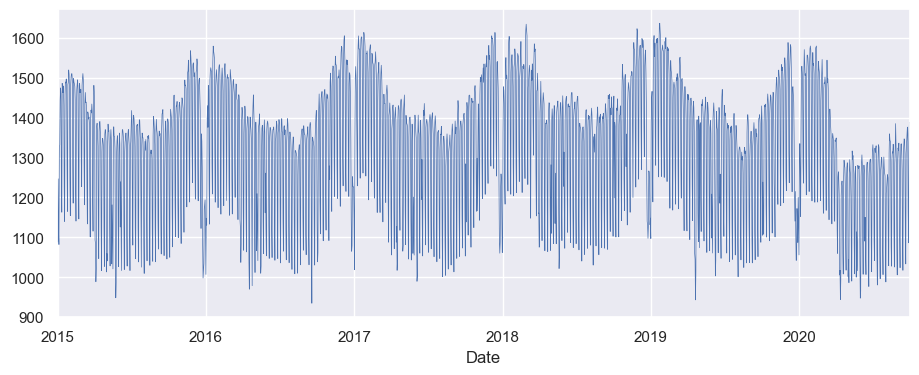

In [98]:
opsd_daily["Consumption"].plot(linewidth=0.5)
plt.show()

<p>We can see that the <code>plot()</code> method has chosen pretty good tick locations and labels (the years) for the x-axis, which is helpful. However, with so many data points, the line plot is crowded and hard to read. Let’s plot the data as dots instead, and also look at the <code>Solar</code> and <code>Wind</code> time series.</p>

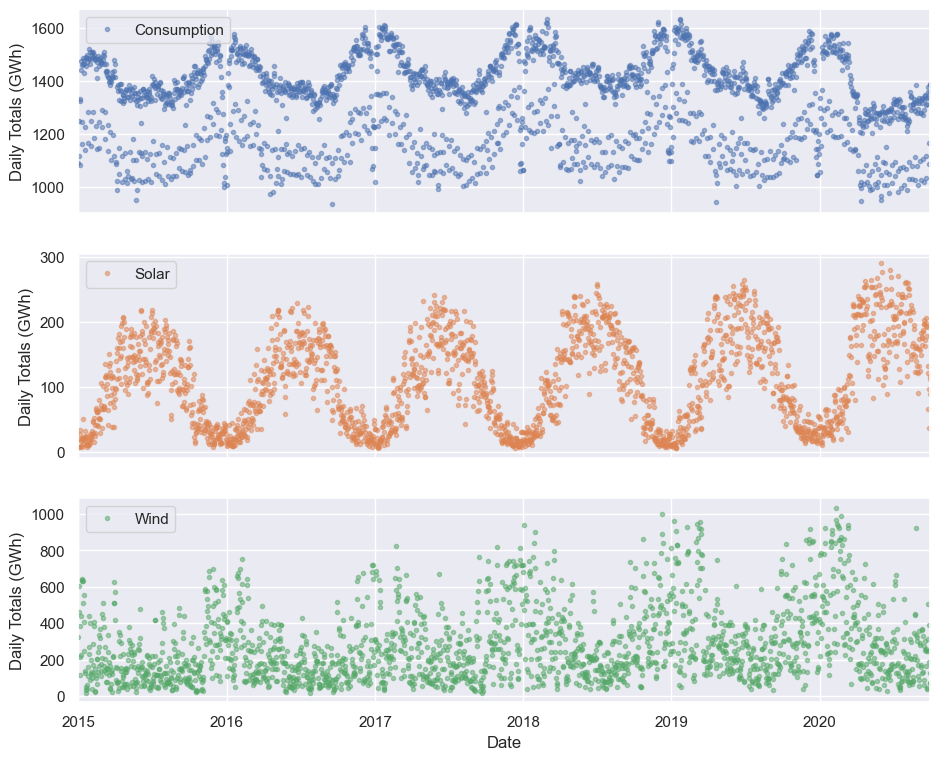

In [99]:
cols_plot = ["Consumption", "Solar", "Wind"]

axes = opsd_daily[cols_plot].plot(marker=".", alpha=0.5, linestyle="None", figsize=(11, 9), subplots=True)

for ax in axes:
    ax.set_ylabel("Daily Totals (GWh)")

plt.show()

<p>We can already see some interesting patterns emerge:</p>
    <ul>
<li>Electricity consumption is highest in winter, presumably due to electric heating and increased lighting usage, and lowest in summer.</li>
<li>Electricity consumption appears to split into two clusters — one with oscillations centered roughly around 1400 GWh, and another with fewer and more scattered data points, centered roughly around 1150 GWh. We might guess that these clusters correspond with weekdays and weekends, and we will investigate this further shortly.</li>
<li>Solar power production is highest in summer, when sunlight is most abundant, and lowest in winter.</li>
<li>Wind power production is highest in winter, presumably due to stronger winds and more frequent storms, and lowest in summer.</li>
<li>There appears to be a strong increasing trend in wind power production over the years.</li>
</ul>

<p>All three time series clearly exhibit periodicity—often referred to as <strong>seasonality</strong> in time series analysis—in which a pattern repeats again and again at regular time intervals. The <code>Consumption</code>, <code>Solar</code>, and <code>Wind</code> time series oscillate between high and low values on a yearly time scale, corresponding with the seasonal changes in weather over the year. However, seasonality in general does not have to correspond with the meteorological seasons. For example, retail sales data often exhibits yearly seasonality with increased sales in November and December, leading up to the holidays.</p>

Seasonality can also occur on other time scales. The plot above suggests there may be some weekly seasonality in Germany’s electricity consumption, corresponding with weekdays and weekends. Let’s plot the time series in a single year to investigate further.

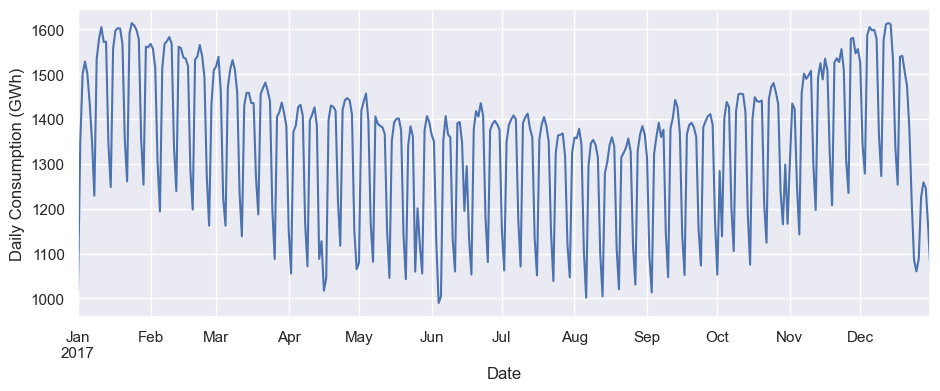

In [100]:
ax = opsd_daily.loc["2017", "Consumption"].plot()
ax.set_ylabel("Daily Consumption (GWh)")
plt.show()

Now we can clearly see the weekly oscillations. Another interesting feature that becomes apparent at this level of granularity is the drastic decrease in electricity consumption in early January and late December, during the holidays.

Let’s zoom in further and look at just January and February.

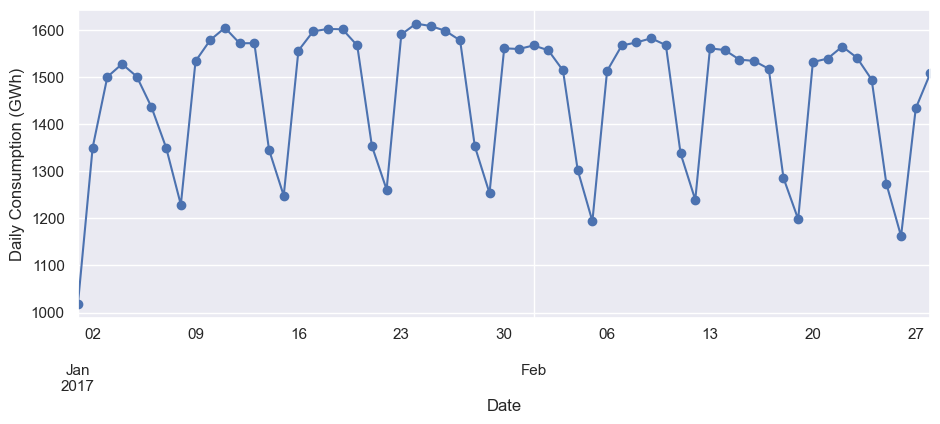

In [101]:
ax = opsd_daily.loc["2017-01":"2017-02", "Consumption"].plot(marker="o", linestyle="-")
ax.set_ylabel("Daily Consumption (GWh)")
plt.show()

As we suspected, consumption is highest on weekdays and lowest on weekends.

### Customizing time series plots

<p>To better visualize the weekly seasonality in electricity consumption in the plot above, it would be nice to have vertical gridlines on a weekly time scale (instead of on the first day of each month). We can customize our plot with <a href="https://matplotlib.org/api/dates_api.html">matplotlib.dates</a>, so let’s import that module.</p>

In [102]:
import matplotlib.dates as mdates

<p>Because date/time ticks are handled a bit differently in matplotlib.dates compared with the DataFrame’s <code>plot()</code> method, let’s create the plot directly in matplotlib. Then we use <code>mdates.WeekdayLocator()</code> and <code>mdates.MONDAY</code> to set the x-axis ticks to the first Monday of each week. We also use <code>mdates.DateFormatter()</code> to improve the formatting of the tick labels, using the <a href="https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior">format codes</a> we saw earlier.</p>

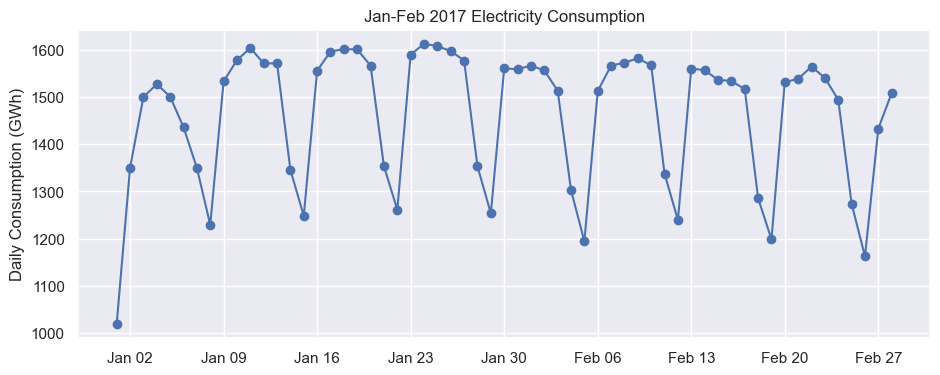

In [103]:
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc["2017-01":"2017-02", "Consumption"], marker="o", linestyle="-")
ax.set_ylabel("Daily Consumption (GWh)")
ax.set_title("Jan-Feb 2017 Electricity Consumption")
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
plt.show()

Now we have vertical gridlines and nicely formatted tick labels on each Monday, so we can easily tell which days are weekdays and weekends.

There are many other ways to visualize time series, depending on what patterns you’re trying to explore — scatter plots, heatmaps, histograms, and so on. We’ll see other visualization examples in the following sections, including visualizations of time series data that has been transformed in some way, such as aggregated or smoothed data.

## Seasonality

- [Understanding Boxplots](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)
- [Trend, Seasonality, Moving Average, Auto Regressive Model : My Journey to Time Series Data with Interactive Code](https://towardsdatascience.com/trend-seasonality-moving-average-auto-regressive-model-my-journey-to-time-series-data-with-edc4c0c8284b)
- [Seasonality](https://en.wikipedia.org/wiki/Seasonality)

<p>Next, let’s further explore the seasonality of our data with <a href="https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51">box plots</a>, using seaborn’s <code>boxplot()</code> function to group the data by different time periods and display the distributions for each group. We’ll first group the data by month, to visualize yearly seasonality.</p>

<img src="images/1_NRlqiZGQdsIyAu0KzP7LaQ.png">

**Python zip**

In [104]:
numberList = [1, 2, 3]
strList = ["one", "two", "three"]

list(zip(numberList, strList))

[(1, 'one'), (2, 'two'), (3, 'three')]

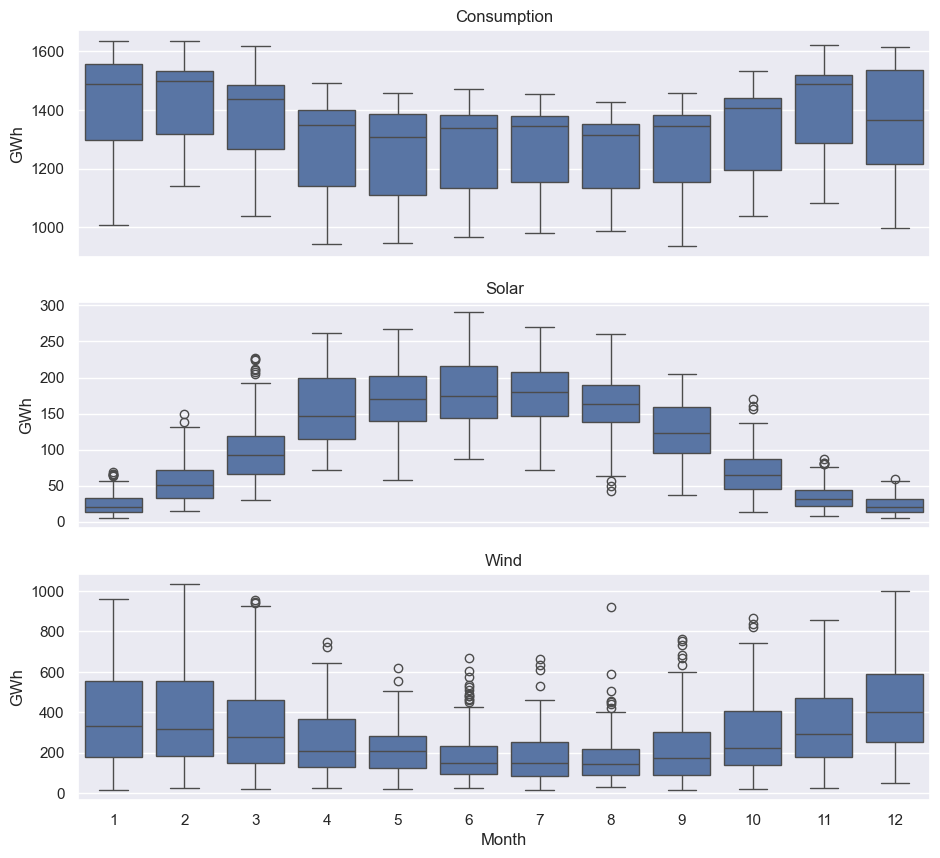

In [105]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(["Consumption", "Solar", "Wind"], axes):
    sns.boxplot(data=opsd_daily, x="Month", y=name, ax=ax)
    ax.set_ylabel("GWh")
    ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel("")
plt.show()

These box plots confirm the yearly seasonality that we saw in earlier plots and provide some additional insights:
- Although electricity consumption is generally higher in winter and lower in summer, the median and lower two quartiles are lower in December and January compared to November and February, likely due to businesses being closed over the holidays. We saw this in the time series for the year 2017, and the box plot confirms that this is consistent pattern throughout the years.
- While solar and wind power production both exhibit a yearly seasonality, the wind power distributions have many more outliers, reflecting the effects of occasional extreme wind speeds associated with storms and other transient weather conditions.

Next, let’s group the electricity consumption time series by day of the week, to explore weekly seasonality.

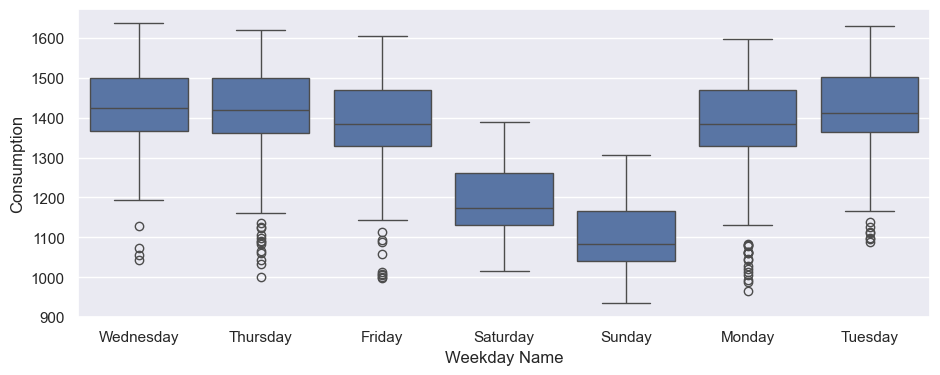

In [107]:
sns.boxplot(data=opsd_daily, x="Weekday Name", y="Consumption")
plt.show()

As expected, electricity consumption is significantly higher on weekdays than on weekends. The low outliers on weekdays are presumably during holidays.

## Frequencies

<p>When the data points of a time series are uniformly spaced in time (e.g., hourly, daily, monthly, etc.), the time series can be associated with a <strong>frequency</strong> in pandas. For example, let’s use the <code>date_range()</code> function to create a sequence of uniformly spaced dates from <code>1998-03-10</code> through <code>1998-03-15</code> at daily frequency.</p>

In [109]:
pd.date_range("1998-03-10", "1998-03-15", freq="D")

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

<p>The resulting DatetimeIndex has an attribute <code>freq</code> with a value of <code>'D'</code>, indicating daily frequency. Available frequencies in pandas include hourly (<code>'H'</code>), calendar daily (<code>'D'</code>), business daily (<code>'B'</code>), weekly (<code>'W'</code>), monthly (<code>'M'</code>), quarterly (<code>'Q'</code>), annual (<code>'A'</code>), and <a href="https://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases">many others</a>. Frequencies can also be specified as multiples of any of the base frequencies, for example <code>'5D'</code> for every five days.</p>

<table>
<thead><tr>
<th>Code</th>
<th>Description</th>
<th>Code</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>D</code></td>
<td>Calendar day</td>
<td><code>B</code></td>
<td>Business day</td>
</tr>
<tr>
<td><code>W</code></td>
<td>Weekly</td>
<td></td>
<td></td>
</tr>
<tr>
<td><code>M</code></td>
<td>Month end</td>
<td><code>BM</code></td>
<td>Business month end</td>
</tr>
<tr>
<td><code>Q</code></td>
<td>Quarter end</td>
<td><code>BQ</code></td>
<td>Business quarter end</td>
</tr>
<tr>
<td><code>A</code></td>
<td>Year end</td>
<td><code>BA</code></td>
<td>Business year end</td>
</tr>
<tr>
<td><code>H</code></td>
<td>Hours</td>
<td><code>BH</code></td>
<td>Business hours</td>
</tr>
<tr>
<td><code>T</code></td>
<td>Minutes</td>
<td></td>
<td></td>
</tr>
<tr>
<td><code>S</code></td>
<td>Seconds</td>
<td></td>
<td></td>
</tr>
<tr>
<td><code>L</code></td>
<td>Milliseonds</td>
<td></td>
<td></td>
</tr>
<tr>
<td><code>U</code></td>
<td>Microseconds</td>
<td></td>
<td></td>
</tr>
<tr>
<td><code>N</code></td>
<td>nanoseconds</td>
<td></td>
<td></td>
</tr>
</tbody>
</table>

The monthly, quarterly, and annual frequencies are all marked at the end of the specified period. By adding an S suffix to any of these, they instead will be marked at the beginning:

<table>
<thead><tr>
<th>Code</th>
<th>Description</th>
<th></th>
<th>Code</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>MS</code></td>
<td>Month start</td>
<td></td>
<td><code>BMS</code></td>
<td>Business month start</td>
</tr>
<tr>
<td><code>QS</code></td>
<td>Quarter start</td>
<td></td>
<td><code>BQS</code></td>
<td>Business quarter start</td>
</tr>
<tr>
<td><code>AS</code></td>
<td>Year start</td>
<td></td>
<td><code>BAS</code></td>
<td>Business year start</td>
</tr>
</tbody>
</table>

<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p>Additionally, you can change the month used to mark any quarterly or annual code by adding a three-letter month code as a suffix:</p>
<ul>
<li><code>Q-JAN</code>, <code>BQ-FEB</code>, <code>QS-MAR</code>, <code>BQS-APR</code>, etc.</li>
<li><code>A-JAN</code>, <code>BA-FEB</code>, <code>AS-MAR</code>, <code>BAS-APR</code>, etc.</li>
</ul>
<p>In the same way, the split-point of the weekly frequency can be modified by adding a three-letter weekday code:</p>
<ul>
<li><code>W-SUN</code>, <code>W-MON</code>, <code>W-TUE</code>, <code>W-WED</code>, etc.</li>
</ul>
<p>On top of this, codes can be combined with numbers to specify other frequencies.
For example, for a frequency of 2 hours 30 minutes, we can combine the hour (<code>H</code>) and minute (<code>T</code>) codes as follows:</p>
</div>


In [111]:
pd.timedelta_range(0, periods=9, freq="2h30min")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150min')

As another example, let’s create a date range at hourly frequency, specifying the start date and number of periods, instead of the start date and end date.

In [112]:
pd.date_range("2004-09-20", periods=8, freq="h")

DatetimeIndex(['2004-09-20 00:00:00', '2004-09-20 01:00:00',
               '2004-09-20 02:00:00', '2004-09-20 03:00:00',
               '2004-09-20 04:00:00', '2004-09-20 05:00:00',
               '2004-09-20 06:00:00', '2004-09-20 07:00:00'],
              dtype='datetime64[ns]', freq='h')

<hr>

Now let’s take another look at the DatetimeIndex of our opsd_daily time series.

In [113]:
opsd_daily.index

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09',
               ...
               '2020-09-21', '2020-09-22', '2020-09-23', '2020-09-24',
               '2020-09-25', '2020-09-26', '2020-09-27', '2020-09-28',
               '2020-09-29', '2020-09-30'],
              dtype='datetime64[ns]', name='Date', length=2101, freq=None)

<p>We can see that it has no frequency (<code>freq=None</code>). This makes sense, since the index was created from a sequence of dates in our CSV file, without explicitly specifying any frequency for the time series.</p>

<p>If we know that our data should be at a specific frequency, we can use the DataFrame’s <code>asfreq()</code> method to assign a frequency. If any date/times are missing in the data, new rows will be added for those date/times, which are either empty (<code>NaN</code>), or filled according to a specified data filling method such as forward filling or interpolation.</p>

<p>To see how this works, let’s create a new DataFrame which contains only the <code>Consumption</code> data for Feb 3, 6, and 8, 2018.</p>

In [118]:
# To select an arbitrary sequence of date/time values from a pandas time series,
# we need to use a DatetimeIndex, rather than simply a list of date/time strings
times_sample = pd.to_datetime(["2018-02-03", "2018-02-06", "2018-02-08"])
# Select the specified dates and just the Consumption column
consum_sample = opsd_daily.loc[times_sample, ["Consumption"]].copy()
consum_sample

,Consumption
2018-02-03,1288.114
2018-02-06,1539.424
2018-02-08,1556.303


<p>Now we use the <code>asfreq()</code> method to convert the DataFrame to daily frequency, with a column for unfilled data, and a column for forward filled data.</p>

In [119]:
# Convert the data to daily frequency, without filling any missings
consum_freq = consum_sample.asfreq("D")

In [120]:
consum_freq

,Consumption
2018-02-03,1288.114
2018-02-04,NaN
2018-02-05,NaN
2018-02-06,1539.424
2018-02-07,NaN
2018-02-08,1556.303


In [121]:
# Create a column with missings forward filled
consum_freq["Consumption - Forward Fill"] = consum_sample.asfreq("D", method="ffill")
consum_freq

,Consumption,Consumption - Forward Fill
2018-02-03,1288.114,1288.114
2018-02-04,NaN,1288.114
2018-02-05,NaN,1288.114
2018-02-06,1539.424,1539.424
2018-02-07,NaN,1539.424
2018-02-08,1556.303,1556.303


<p>In the <code>Consumption</code> column, we have the original data, with a value of <code>NaN</code> for any date that was missing in our <code>consum_sample</code> DataFrame. In the <code>Consumption - Forward Fill</code> column, the missings have been forward filled, meaning that the last value repeats through the missing rows until the next non-missing value occurs.</p>

<p>If you’re doing any time series analysis which requires uniformly spaced data without any missings, you’ll want to use <code>asfreq()</code> to convert your time series to the specified frequency and fill any missings with an appropriate method.</p>

## Resampling

<p>It is often useful to <strong>resample</strong> our time series data to a lower or higher frequency. Resampling to a lower frequency (<strong>downsampling</strong>) usually involves an aggregation operation — for example, computing monthly sales totals from daily data. The daily OPSD data we’re working with in this tutorial was <a href="https://github.com/jenfly/opsd/blob/master/time-series-preprocessing.ipynb">downsampled from the original hourly time series</a>. Resampling to a higher frequency (<strong>upsampling</strong>) is less common and often involves interpolation or other data filling method — for example, interpolating hourly weather data to 10 minute intervals for input to a scientific model.</p>

<p>We will focus here on downsampling, exploring how it can help us analyze our OPSD data on various time scales. We use the DataFrame’s <code>resample()</code> method, which splits the DatetimeIndex into time bins and groups the data by time bin. The <code>resample()</code> method returns a <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html">Resampler object</a>, similar to a pandas <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html#pandas.DataFrame.groupby">GroupBy object</a>. We can then apply an aggregation method such as <code>mean()</code>, <code>median()</code>, <code>sum()</code>, etc., to the data group for each time bin.</p>

For example, let’s resample the data to a weekly mean time series.

In [122]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ["Consumption", "Wind", "Solar", "Wind+Solar"]
# Resample to weekly frequency, aggregating with mean
opsd_weekly_mean = opsd_daily[data_columns].resample("W").mean()
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2015-01-04,1133.609750,444.174250,11.658667,495.502667
2015-01-11,1348.586429,415.439000,18.889857,434.328857
2015-01-18,1384.144286,374.467571,24.578714,399.046286


In [123]:
opsd_weekly_mean.index

DatetimeIndex(['2015-01-04', '2015-01-11', '2015-01-18', '2015-01-25',
               '2015-02-01', '2015-02-08', '2015-02-15', '2015-02-22',
               '2015-03-01', '2015-03-08',
               ...
               '2020-08-02', '2020-08-09', '2020-08-16', '2020-08-23',
               '2020-08-30', '2020-09-06', '2020-09-13', '2020-09-20',
               '2020-09-27', '2020-10-04'],
              dtype='datetime64[ns]', name='Date', length=301, freq='W-SUN')

<p>The first row above, labelled <code>2006-01-01</code>, contains the mean of all the data contained in the time bin <code>2006-01-01</code> through <code>2006-01-07</code>. The second row, labelled <code>2006-01-08</code>, contains the mean data for the <code>2006-01-08</code> through <code>2006-01-14</code> time bin, and so on. By default, each row of the downsampled time series is labelled with the left edge of the time bin.</p>

By construction, our weekly time series has 1/7 as many data points as the daily time series. We can confirm this by comparing the number of rows of the two DataFrames.

In [124]:
print(opsd_daily.shape[0])

2101


In [125]:
print(opsd_weekly_mean.shape[0])

301


Let’s plot the daily and weekly Solar time series together over a single six-month period to compare them.

In [126]:
# Start and end of the date range to extract
start, end = "2017-01", "2017-06"

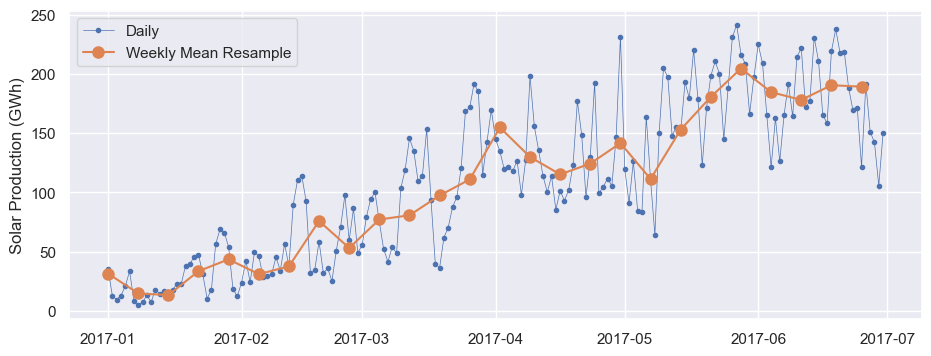

In [127]:
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()

ax.plot(opsd_daily.loc[start:end, "Solar"], marker=".", linestyle="-", linewidth=0.5, label="Daily")

ax.plot(opsd_weekly_mean.loc[start:end, "Solar"], marker="o", markersize=8, linestyle="-", label="Weekly Mean Resample")

ax.set_ylabel("Solar Production (GWh)")
ax.legend()
plt.show()

We can see that the weekly mean time series is smoother than the daily time series because higher frequency variability has been averaged out in the resampling.

In [128]:
# Compute the monthly sums, setting the value to NaN for any month which has
# fewer than 28 days of data
opsd_monthly = opsd_daily[data_columns].resample("M").sum(min_count=28)
opsd_monthly.head(3)

C:\Users\leon1\AppData\Local\Temp\ipykernel_25396\1508648215.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  opsd_monthly = opsd_daily[data_columns].resample("M").sum(min_count=28)


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2014-12-31,NaN,NaN,NaN,NaN
2015-01-31,42223.551,9340.228,542.594,9557.657
2015-02-28,39260.708,5161.846,NaN,NaN


<p>You might notice that the monthly resampled data is labelled with the end of each month (the right bin edge), whereas the weekly resampled data is labelled with the left bin edge. By default, resampled data is labelled with the right bin edge for monthly, quarterly, and annual frequencies, and with the left bin edge for all other frequencies. This behavior and various other options can be adjusted using the parameters listed in the <code>resample()</code> documentation.</p>

Now let’s explore the monthly time series by plotting the electricity consumption as a line plot, and the wind and solar power production together as a stacked area plot.

c:\LEON\ICTA\ICT_Academy_Git_Repos\python-data-analytics\.venv\Lib\site-packages\pandas\plotting\_matplotlib\core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


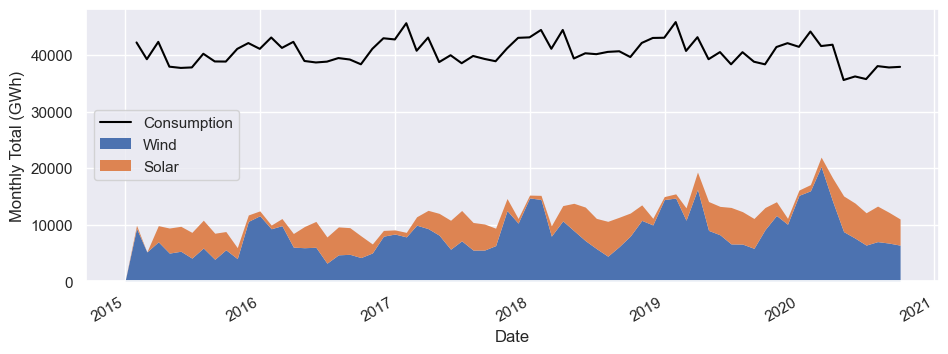

In [129]:
fig, ax = plt.subplots()

ax.plot(opsd_monthly["Consumption"], color="black", label="Consumption")

opsd_monthly[["Wind", "Solar"]].plot.area(ax=ax, linewidth=0)

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel("Monthly Total (GWh)")
plt.show()

At this monthly time scale, we can clearly see the yearly seasonality in each time series, and it is also evident that electricity consumption has been fairly stable over time, while wind power production has been growing steadily, with wind + solar power comprising an increasing share of the electricity consumed.

<p>Let’s explore this further by resampling to annual frequency and computing the ratio of <code>Wind+Solar</code> to <code>Consumption</code> for each year.</p>

In [137]:
# Compute the annual sums, setting the value to NaN for any year which has
# fewer than 360 days of data
opsd_annual = opsd_daily[data_columns].resample("YE").sum(min_count=300)
# The default index of the resampled DataFrame is the last day of each year,
# ('2006-12-31', '2007-12-31', etc.) so to make life easier, set the index
# to the year component

In [138]:
opsd_annual.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2014-12-31,NaN,NaN,NaN,NaN
2015-12-31,479496.047,77172.286,34779.771,111419.348
2016-12-31,486995.370,74996.242,34146.371,109089.308
2017-12-31,492116.437,102670.983,35882.978,138553.961
2018-12-31,498895.226,108564.492,41231.973,149796.465


In [139]:
opsd_annual = opsd_annual.set_index(opsd_annual.index.year)
opsd_annual.index.name = "Year"

In [140]:
opsd_annual.head()

,Consumption,Wind,Solar,Wind+Solar
Year,,,,
2014,NaN,NaN,NaN,NaN
2015,479496.047,77172.286,34779.771,111419.348
2016,486995.370,74996.242,34146.371,109089.308
2017,492116.437,102670.983,35882.978,138553.961
2018,498895.226,108564.492,41231.973,149796.465


In [141]:
# Compute the ratio of Wind+Solar to Consumption
opsd_annual["Wind+Solar/Consumption"] = opsd_annual["Wind+Solar"] / opsd_annual["Consumption"]
opsd_annual.tail(3)

,Consumption,Wind,Solar,Wind+Solar,Wind+Solar/Consumption
Year,,,,,
2018,498895.226,108564.492,41231.973,149796.465,0.300256
2019,490474.666,123801.867,41914.747,165716.614,0.337870
2020,NaN,NaN,NaN,NaN,NaN


Finally, let’s plot the wind + solar share of annual electricity consumption as a bar chart.

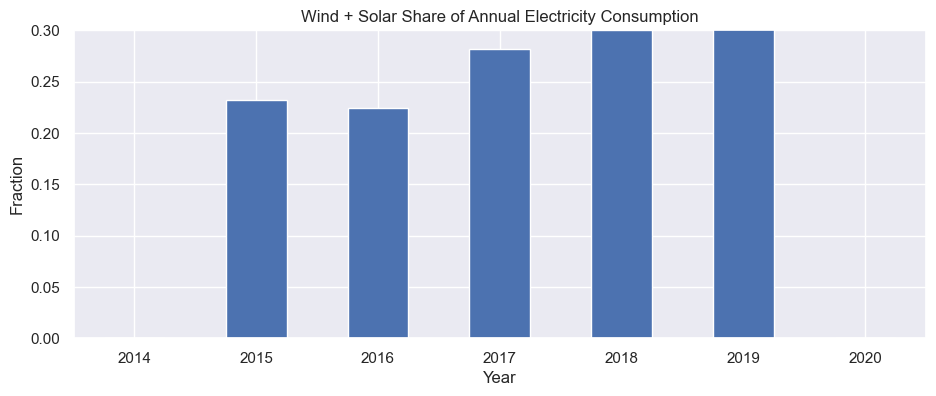

In [144]:
# Plot from 2012 onwards, because there is no solar production data in earlier years
ax = opsd_annual.loc[2012:, "Wind+Solar/Consumption"].plot.bar(color="C0")
ax.set_ylabel("Fraction")
ax.set_ylim(0, 0.3)
ax.set_title("Wind + Solar Share of Annual Electricity Consumption")
plt.xticks(rotation=0)
plt.show()

## Rolling windows

<p><strong>Rolling window</strong> operations are another important transformation for time series data. Similar to downsampling, rolling windows split the data into time windows and and the data in each window is aggregated with a function such as <code>mean()</code>, <code>median()</code>, <code>sum()</code>, etc. However, unlike downsampling, where the time bins do not overlap and the output is at a lower frequency than the input, rolling windows overlap and “roll” along at the same frequency as the data, so the transformed time series is at the same frequency as the original time series.</p>

<img src="images/rollingwindow.png">

<p>By default, all data points within a window are equally weighted in the aggregation, but this can be changed by specifying window types such as Gaussian, triangular, and <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html">others</a>. We’ll stick with the standard equally weighted window here.</p>

<p>Let’s use the <code>rolling()</code> method to compute the 7-day rolling mean of our daily data. We use the <code>center=True</code> argument to label each window at its midpoint, so the rolling windows are:</p>

<ul>
<li><code>2006-01-01</code> to <code>2006-01-07</code> — labelled as <code>2006-01-04</code></li>
<li><code>2006-01-02</code> to <code>2006-01-08</code> — labelled as <code>2006-01-05</code></li>
<li><code>2006-01-03</code> to <code>2006-01-09</code> — labelled as <code>2006-01-06</code></li>
<li>and so on…</li>
</ul>

In [145]:
# Compute the centered 7-day rolling mean
opsd_7d = opsd_daily[data_columns].rolling(7, center=True).mean()
opsd_7d.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2014-12-31,NaN,NaN,NaN,NaN
2015-01-01,NaN,NaN,NaN,NaN
2015-01-02,NaN,NaN,NaN,NaN
2015-01-03,NaN,NaN,NaN,NaN
2015-01-04,1233.569571,333.952571,NaN,NaN
2015-01-05,1288.720714,350.403000,17.157000,367.560000
2015-01-06,1319.123714,355.856571,17.023429,372.880000
2015-01-07,1337.018429,380.388286,18.914286,399.302571
2015-01-08,1348.586429,415.439000,18.889857,434.328857


We can see that the first non-missing rolling mean value is on 2006-01-04, because this is the midpoint of the first rolling window.

To visualize the differences between rolling mean and resampling, let’s update our earlier plot of January-June 2017 solar power production to include the 7-day rolling mean along with the weekly mean resampled time series and the original daily data.

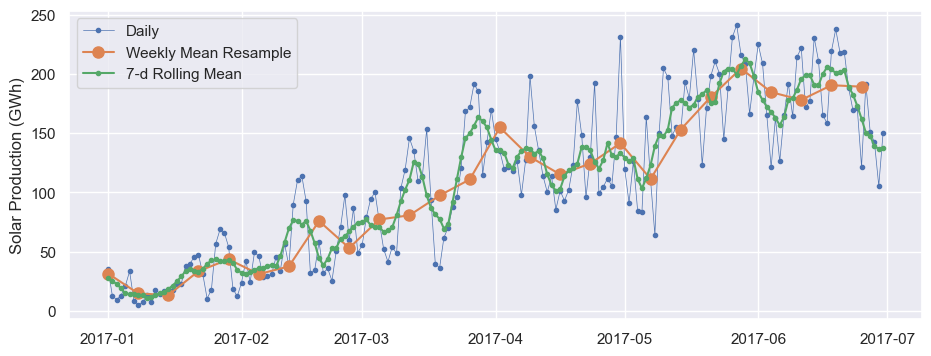

In [146]:
# Start and end of the date range to extract
start, end = "2017-01", "2017-06"

# Plot daily, weekly resampled, and 7-day rolling mean time series together
fig, ax = plt.subplots()

ax.plot(opsd_daily.loc[start:end, "Solar"], marker=".", linestyle="-", linewidth=0.5, label="Daily")

ax.plot(opsd_weekly_mean.loc[start:end, "Solar"], marker="o", markersize=8, linestyle="-", label="Weekly Mean Resample")

ax.plot(opsd_7d.loc[start:end, "Solar"], marker=".", linestyle="-", label="7-d Rolling Mean")

ax.set_ylabel("Solar Production (GWh)")
ax.legend()
plt.show()

<p>We can see that data points in the rolling mean time series have the same spacing as the daily data, but the curve is smoother because higher frequency variability has been averaged out. In the rolling mean time series, the peaks and troughs tend to align closely with the peaks and troughs of the daily time series. In contrast, the peaks and troughs in the weekly resampled time series are less closely aligned with the daily time series, since the resampled time series is at a coarser granularity.</p>

## Trends

<p>Time series data often exhibit some slow, gradual variability in addition to higher frequency variability such as seasonality and noise. An easy way to visualize these <strong>trends</strong> is with rolling means at different time scales.</p>

<p>A rolling mean tends to smooth a time series by averaging out variations at frequencies much higher than the window size and averaging out any seasonality on a time scale equal to the window size. This allows lower-frequency variations in the data to be explored. Since our electricity consumption time series has weekly and yearly seasonality, let’s look at rolling means on those two time scales.</p>

We’ve already computed 7-day rolling means, so now let’s compute the 365-day rolling mean of our OPSD data.

In [147]:
# The min_periods=360 argument accounts for a few isolated missing days in the
# wind and solar production time series
opsd_365d = opsd_daily[data_columns].rolling(window=365, center=True, min_periods=360).mean()

Let’s plot the 7-day and 365-day rolling mean electricity consumption, along with the daily time series.

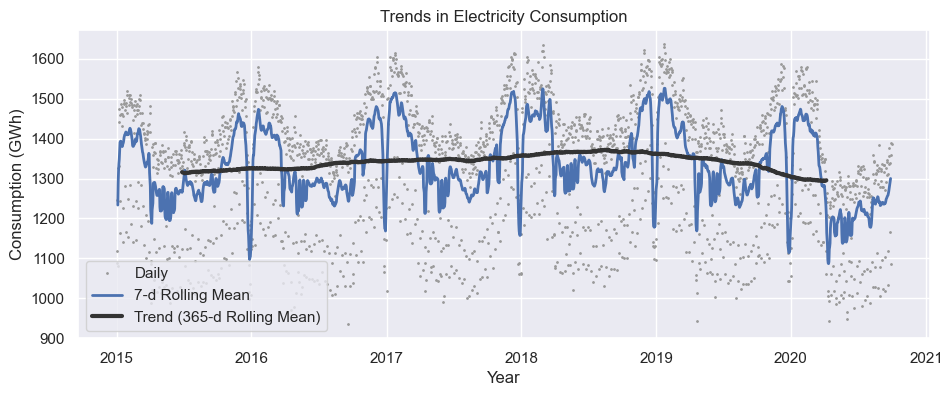

In [148]:
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()

ax.plot(opsd_daily["Consumption"], marker=".", markersize=2, color="0.6", linestyle="None", label="Daily")

ax.plot(opsd_7d["Consumption"], linewidth=2, label="7-d Rolling Mean")

ax.plot(opsd_365d["Consumption"], color="0.2", linewidth=3, label="Trend (365-d Rolling Mean)")

# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Consumption (GWh)")
ax.set_title("Trends in Electricity Consumption")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.show()

<p>We can see that the 7-day rolling mean has smoothed out all the weekly seasonality, while preserving the yearly seasonality. The 7-day rolling mean reveals that while electricity consumption is typically higher in winter and lower in summer, there is a dramatic decrease for a few weeks every winter at the end of December and beginning of January, during the holidays.</p>

Looking at the 365-day rolling mean time series, we can see that the long-term trend in electricity consumption is pretty flat, with a couple of periods of anomalously low consumption around 2009 and 2012-2013.

Now let’s look at trends in wind and solar production.

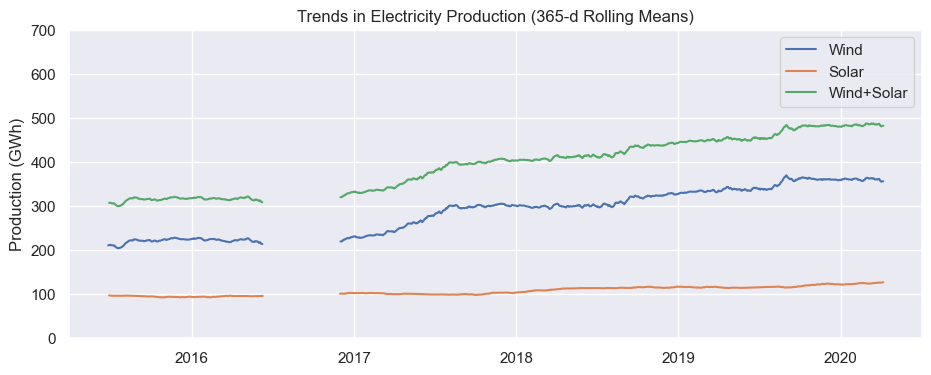

In [150]:
# Plot 365-day rolling mean time series of wind and solar power
fig, ax = plt.subplots()

for nm in ["Wind", "Solar", "Wind+Solar"]:
    ax.plot(opsd_365d[nm], label=nm)

# Set x-ticks to yearly interval, adjust y-axis limits, add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.set_ylim(0, 700)
ax.legend()
ax.set_ylabel("Production (GWh)")
ax.set_title("Trends in Electricity Production (365-d Rolling Means)")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.show()

We can see a small increasing trend in solar power production and a large increasing trend in wind power production, as Germany continues to expand its capacity in those sectors.